# Fine-Tuning ResNet-18

A lot of the code is from here: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/colab_projects/cocoapi/notebooks/

/content/drive/MyDrive/colab_projects/cocoapi/notebooks


## CONFIG

In [3]:
WEIGHT_DECAY=0
MODEL_NAME = f'baseline-2021-06-08'
MODEL_NAME

'baseline-2021-06-08'

## Model Descriptions

* batch size: 32
* augmentation
    * baseline train transforms: **at the beginning**
        1. resize (224x224)
        2. RandomHorizontalFlip(p=0.5)
        3. Normalize (ImageNet constants)
    * SimCLR train transforms: starting from **strong-aug-longer-Adam-2021-06-14**
        1. resize (224x224) - the only step not like in SimCLR
        2. Random Horizontal Flip
        3. Random  Color Distortion
        4. Random Gaussian Blur
    * dev transforms: **always for dev set**
        1. resize (224x224)
        2. Normalize (ImageNet constants)


### baseline-2021-06-08

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **SGD(lr=1e-3)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
* momentum=0.9
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **SGD(lr=1e-4)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* weight_decay=0
* **momentum=0**

### baseline-2021-06-09

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **SGD(lr=1e-3, momentum=0.9)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
* momentum=0.9
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **SGD(lr=1e-4, momentum=0.9)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* weight_decay=0
* **momentum=0.9**

### baseline-Adam-2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **Adam(lr=1e-3)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **Adam(lr=1e-4)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=0**

### Adam_wd=1e-08_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-8**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-8**

### Adam_wd=0.0001_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-4**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-4**

### Adam_wd=0.01_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-2**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-2**

### Adam_wd=1_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1**

### Adam_wd=10_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=10**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=10**

### Adam_wd=100_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=100**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=100**

### strong-aug-Adam-2021-06-14

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=0**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=0**

### strong-aug-longer-Adam-2021-06-14

Last layer training
* **epochs: 6 (0, ..., 5)**
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(**step_size=4**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2, 3**: 1e-3
    * **epochs 4, 6**: 1e-4
* weight_decay=0
    
All layers training
* **epochs: 14 (6, 8, ..., 19)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * **epochs 6, ..., 12: 1e-4**
    * **epochs 13, ..., 19: 1e-5**
* weight_decay=0

Use **SimCLR_train_transforms** instead of **baseline_train_transforms** for training.

### strong-aug-even-longer-Adam-2021-06-14

Last layer training
* **epochs: 12 (0, ..., 1)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: **1e-2**
    * **epochs 4, 4, 6, 7: 1e-3**
    * **epochs 8, 9, 10, 11: 1e-4**
* weight_decay=0
    
All layers training
* **epochs: 14 (12, 8, ..., 25)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * **epochs 12, ..., 18: 1e-4**
    * **epochs 19, ..., 25: 1e-5**
* weight_decay=0

### strong-aug-not-so-long-Adam-2021-06-14

Last layer training
* **epochs: 6 (0, ..., 6)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(**step_size=3**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2: 1e-2**
    * **epochs 3, 4, 5: 1e-3**
* weight_decay=0
    
All layers training
* **epochs: 10 (6, 7, ..., 15)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=5**, gamma=0.1)
* learning rate alpha:
    * **epochs 6, ..., 10: 1e-4**
    * **epochs 11, ..., 15: 1e-5**
* weight_decay=0

### strong-aug-not-so-long-Adam_wd=0.01_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=0.01**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.01**

### strong-aug-not-so-long-Adam_wd=0.1_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=0.1**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.1**

### strong-aug-not-so-long-Adam_wd=1_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=1**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=1**

### strong-aug-not-so-long-Adam_wd=10_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* **weight_decay=0**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=10**

### strong-aug-not-so-long-Adam_wd=20_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* weight_decay=0*
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=20**

### strong-aug-not-so-long-Adam_wd=40_2021-06-14

Last layer training
* epochs: 6 (0, ..., 5)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2: 1e-2
    * epochs 3, 4, 5: 1e-3
* weight_decay=0*
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=40**

# Before Training

## Imports

In [4]:
import os
import copy

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision.io import read_image
from torchvision import datasets, models, transforms

from tqdm.notebook import trange, tqdm

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [6]:
%cd ./utils/
from dataloaders import CocoNoCropping
from config import CATEGORIES_OF_INTEREST; print(CATEGORIES_OF_INTEREST)
from config import IMG_SIZE; print(IMG_SIZE)
# help(CocoNoCropping) # should not be blank
%cd ..

/content/drive/My Drive/colab_projects/cocoapi/notebooks/utils
['bird', 'cat', 'dog', 'person']
(224, 224)
/content/drive/My Drive/colab_projects/cocoapi/notebooks


## Transforms, Datasets, and Data Loaders

In [7]:
# Strong augmentation from SimCLR (Appendix A. Data Augmentation Details)
# https://arxiv.org/pdf/2002.05709.pdf

def get_color_distortion(s=1.0):
    # s is the strength of color distortion.
    color_jitter = transforms.ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
    rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
    rnd_gray = transforms.RandomGrayscale(p=0.2) # keeps nummber of channels
    color_distort = torch.nn.Sequential(
        rnd_color_jitter,
        rnd_gray)
    
    return color_distort

def get_gaussian_blur(img_size, ratio=0.1):
    # SimCLR: ratio=0.1
    
    # calculating kernel_size and making it odd
    kernel_size = int(img_size[0] * ratio)
    if kernel_size % 2 == 0:
        kernel_size += 1
        
    # sigma=(0.1, 2.0) is default for GaussianBlur; it is also the same in Sim CLR
    gaussian_blur = transforms.GaussianBlur(kernel_size=kernel_size, sigma=(0.1, 2.0))
    
    # SimCLR: p=0.5 
    rnd_gaussian_blur = transforms.RandomApply([gaussian_blur], p=0.5)
    
    return rnd_gaussian_blur

In [8]:
baseline_train_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)



SimCLR_train_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE), # different from SimCLR
    
    # SimCLR aug start
    transforms.RandomHorizontalFlip(),
    get_color_distortion(s=1.0),
    get_gaussian_blur(IMG_SIZE),
    # SimCLR aug end
    
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)



dev_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)

In [19]:
train1_dataset = CocoNoCropping(
    img_ids = '../my_splits/train1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/train1/',
    transform=SimCLR_train_transforms,
    divide_by_255=True
)

dev1_dataset = CocoNoCropping(
    img_ids = '../my_splits/dev1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/dev1/',
    transform=dev_transforms,
    divide_by_255=True
)

In [20]:
# droplast since the number of images is likely not to be divisible by batch_size
example_dataloader = DataLoader(train1_dataset, batch_size=8, shuffle=True, drop_last=True) # for visualization

train1_dataloader = DataLoader(train1_dataset, batch_size=32, shuffle=True, drop_last=True)
dev1_dataloader = DataLoader(dev1_dataset, batch_size=32, shuffle=False, drop_last=True)

## Visualize a few images

In [21]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp.shape)
    
    # ImageNet constants
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


LIMIT = 5
for i, batch in enumerate(example_dataloader):
    inputs, labels = batch['image'], batch['label']

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    plt.subplots(figsize=(18, 3))
    imshow(out)

    display(pd.DataFrame({CATEGORIES_OF_INTEREST[i]: labels[i].numpy() for i in range(len(labels))}).T)
    
    if i == LIMIT:
        break

Output hidden; open in https://colab.research.google.com to view.

## Training and Validation Loops

In [22]:
def train_one_epoch(iterator, model, criterion, optimizer):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='train'):
        model.train()

        inputs = batch['image'].to(device) # [batch size, channel, h, w]
        #print(inputs.shape, inputs.dtype)
        # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
        labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
        #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
        total += labels.shape[0]
        
        optimizer.zero_grad()

        outputs = model(inputs) #logits
        #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
        #print(outputs)

        loss = criterion(outputs, labels)
        epoch_loss += loss.item() # no need to drag 
        #print(loss.item())

        loss.backward()
        optimizer_ft.step()

        preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
        #print(preds)
        per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
        #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

In [23]:
def evaluate(iterator, model, criterion):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='dev'):
        
        # no need for gradients, batch-norm and dropout in evaluation mode
        model.eval()
        with torch.no_grad():
            
            inputs = batch['image'].to(device) # [batch size, channel, h, w]
            #print(inputs.shape, inputs.dtype)
            # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
            labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
            #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
            total += labels.shape[0]

            outputs = model(inputs) #logits
            #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
            #print(outputs)

            loss = criterion(outputs, labels)
            epoch_loss += loss.item() # no need to drag 
            #print(loss.item())

            preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
            #print(preds)
            per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
            #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

# Training

## Fine-tune only the last layer and save (no overfitting here)

In [24]:
device

'cuda:0'

In [25]:
# load pre-trained model
model_ft = models.resnet18(pretrained=True)

# freese all parameters initially
for param in model_ft.parameters():
    param.requires_grad = False
    
# unfreeeze model parameters of the last layer
for param in model_ft.fc.parameters():
    param.requires_grad = True

# replace the last layer to fit the task
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, len(CATEGORIES_OF_INTEREST))

# place it on the device
model_ft = model_ft.to(device)

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.01) # weight_decay=WEIGHT_DECAY

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [26]:
#model_ft

Epoch: 0



Train Avg Acc: 0.742968738079071
Train Loss: 2.5319264590740205
Train Accs per class: tensor([0.8094, 0.8062, 0.7344, 0.6219])




Dev Avg Acc: 0.7890625
Dev Loss: 2.112317657470703
Dev Accs per class: tensor([0.8547, 0.8828, 0.7781, 0.6406])


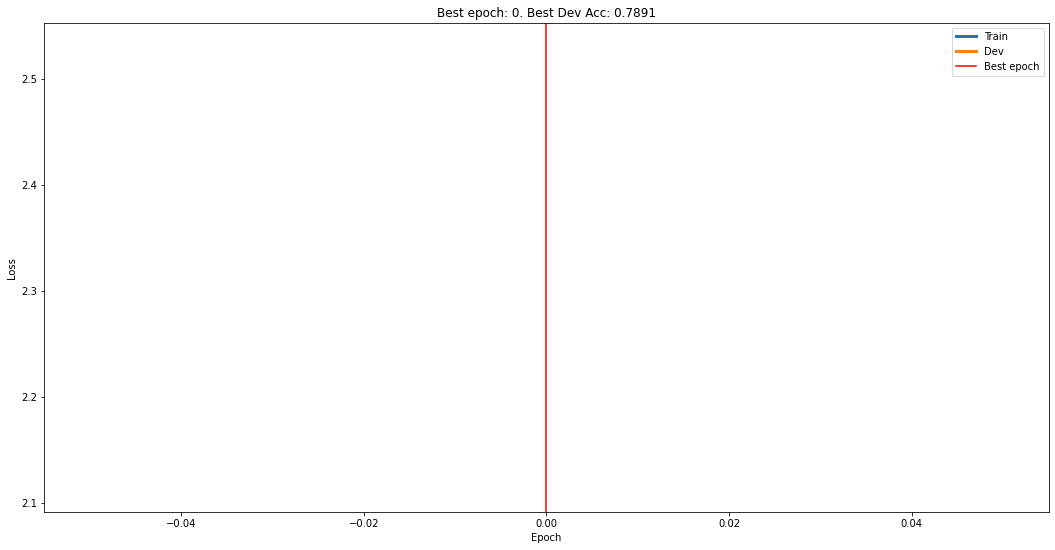


--------------------------------------------------------------------------------

Epoch: 1



Train Avg Acc: 0.809765636920929
Train Loss: 1.8438910245895386
Train Accs per class: tensor([0.8594, 0.8188, 0.8062, 0.7547])




Dev Avg Acc: 0.8148437738418579
Dev Loss: 1.6331781268119812
Dev Accs per class: tensor([0.8594, 0.8203, 0.8000, 0.7797])


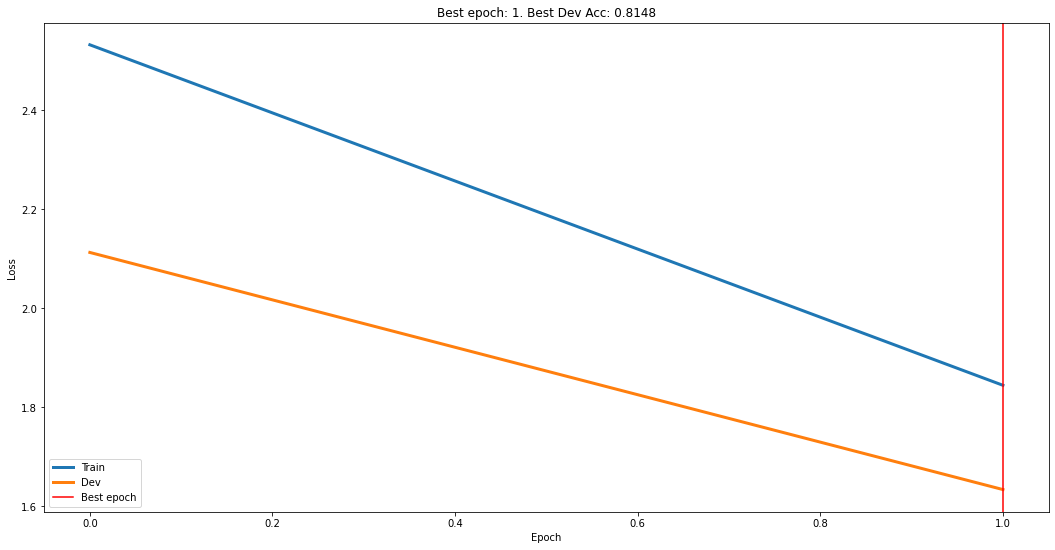


--------------------------------------------------------------------------------

Epoch: 2



Train Avg Acc: 0.846484363079071
Train Loss: 1.306791853904724
Train Accs per class: tensor([0.8766, 0.8562, 0.8219, 0.8313])




Dev Avg Acc: 0.840624988079071
Dev Loss: 1.3936898589134217
Dev Accs per class: tensor([0.8313, 0.8750, 0.8281, 0.8281])


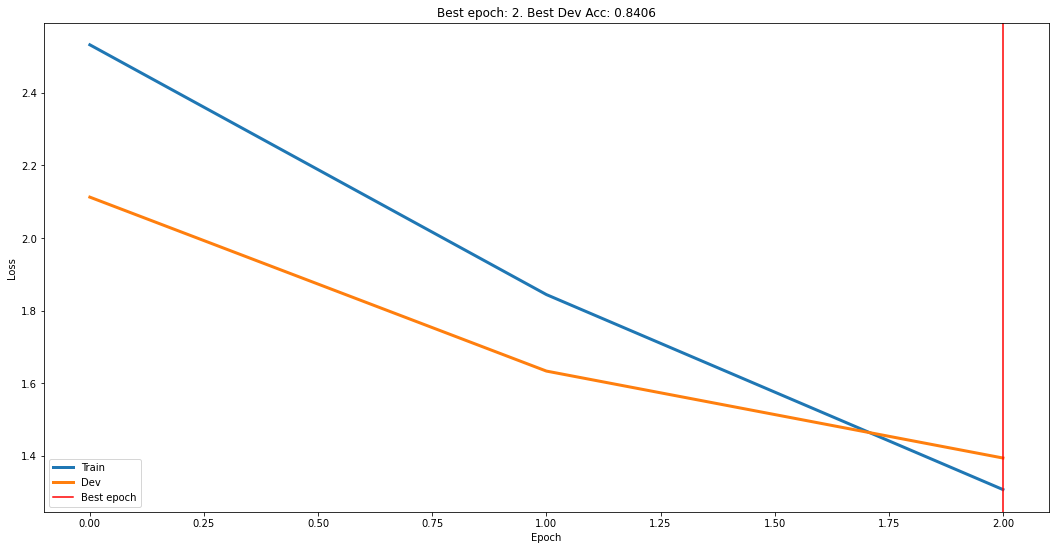


--------------------------------------------------------------------------------

Epoch: 3



Train Avg Acc: 0.859375
Train Loss: 1.26004658639431
Train Accs per class: tensor([0.8641, 0.8828, 0.8406, 0.8500])




Dev Avg Acc: 0.84375
Dev Loss: 1.3884261906147004
Dev Accs per class: tensor([0.8344, 0.8766, 0.8313, 0.8328])


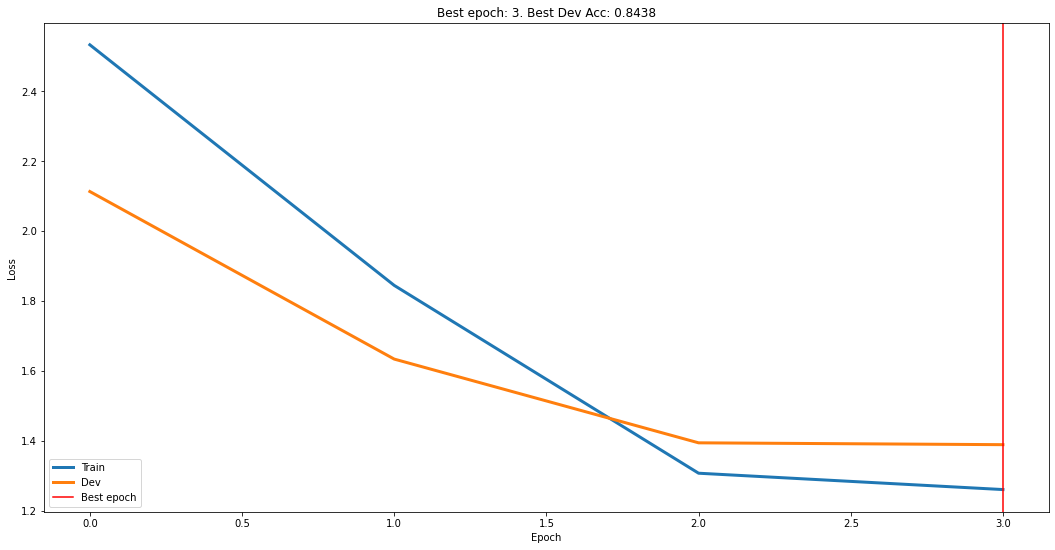


--------------------------------------------------------------------------------


CPU times: user 56.2 s, sys: 2.5 s, total: 58.6 s
Wall time: 1min 4s


In [27]:
%%time
last_layer_num_epochs = 6

train_epoch_loss_history = []
train_per_class_acc_history = []

dev_epoch_loss_history = []
dev_per_class_acc_history = []

dev_epoch_acc_history = []
train_epoch_acc_history = []

best_acc = None
best_epoch = None

best_model_wts = copy.deepcopy(model_ft.state_dict())

for epoch in trange(last_layer_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    
        
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save the model with the last layer fine-tuned - this does not change.

In [ ]:
#LL_FINE_TUNED_MODEL_NAME = 'resnet18-strong-aug-Adam-last-layer-finetuned'
print(LL_FINE_TUNED_MODEL_NAME)
LL_FINE_TUNED_MODEL_PATH = f'../weights/{LL_FINE_TUNED_MODEL_NAME}.pth'
torch.save(model_ft.state_dict(), LL_FINE_TUNED_MODEL_PATH)


history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(el.numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(el.numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

# # load history
# with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json') as f:
#     history = json.load(f)

# history

## Fine-tune all layers with lower learning rate

In [ ]:
device

'cuda:0'

In [28]:
# load model architecture, no need to load weights
model_ft = models.resnet18(pretrained=False)

# replace the last layer to fit the task
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, len(CATEGORIES_OF_INTEREST))

# load the fine-tuned model parameters
model_ft.load_state_dict(torch.load(FINE_TUNED_MODEL_PATH))

# place it on the device
model_ft = model_ft.to(device)

# unfreese all parameters
for param in model_ft.parameters():
    param.requires_grad = True

# criterion and optimizer
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.0001, weight_decay=WEIGHT_DECAY)

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

In [29]:
# load history from the last-layer fine-tuned model
with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json') as f:
    history = json.load(f)
# history

Epoch: 4



Train Avg Acc: 0.8656249642372131
Train Loss: 1.241679275035858
Train Accs per class: tensor([0.8813, 0.8953, 0.8453, 0.8406])




Dev Avg Acc: 0.8464844226837158
Dev Loss: 1.362978023290634
Dev Accs per class: tensor([0.8344, 0.8797, 0.8344, 0.8375])


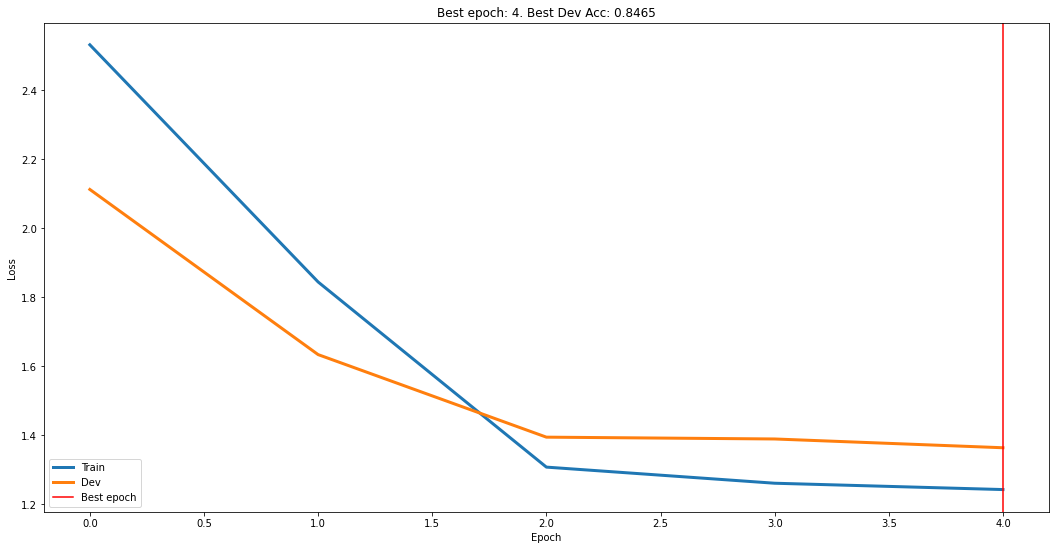


--------------------------------------------------------------------------------

Epoch: 5



Train Avg Acc: 0.8687499761581421
Train Loss: 1.1649060547351837
Train Accs per class: tensor([0.8781, 0.9016, 0.8531, 0.8422])




Dev Avg Acc: 0.848828136920929
Dev Loss: 1.3419441491365434
Dev Accs per class: tensor([0.8328, 0.8844, 0.8297, 0.8484])


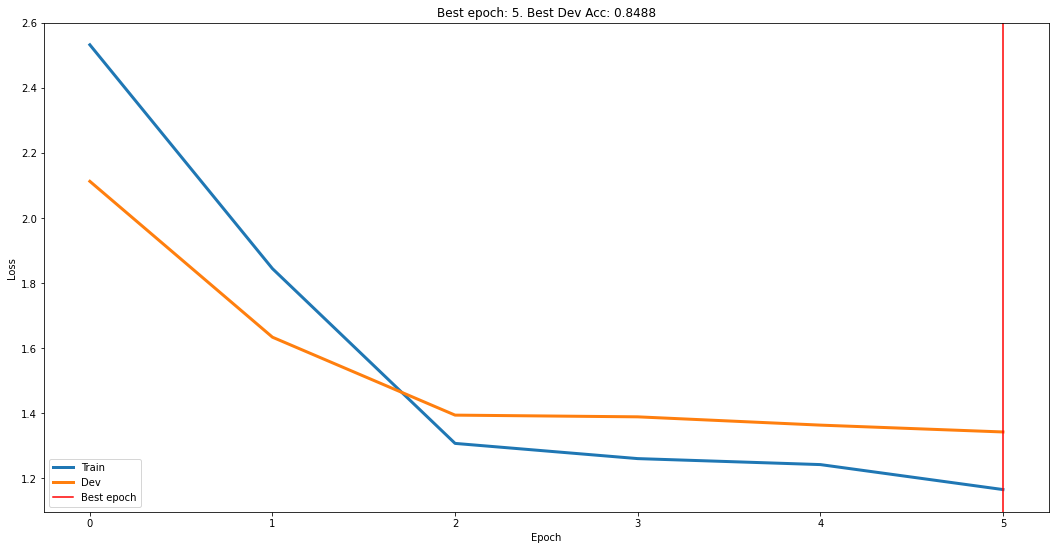


--------------------------------------------------------------------------------

Epoch: 6



Train Avg Acc: 0.8785156607627869
Train Loss: 1.1157312214374542
Train Accs per class: tensor([0.8766, 0.9000, 0.8734, 0.8641])




Dev Avg Acc: 0.854687511920929
Dev Loss: 1.3341247588396072
Dev Accs per class: tensor([0.8469, 0.8875, 0.8375, 0.8469])


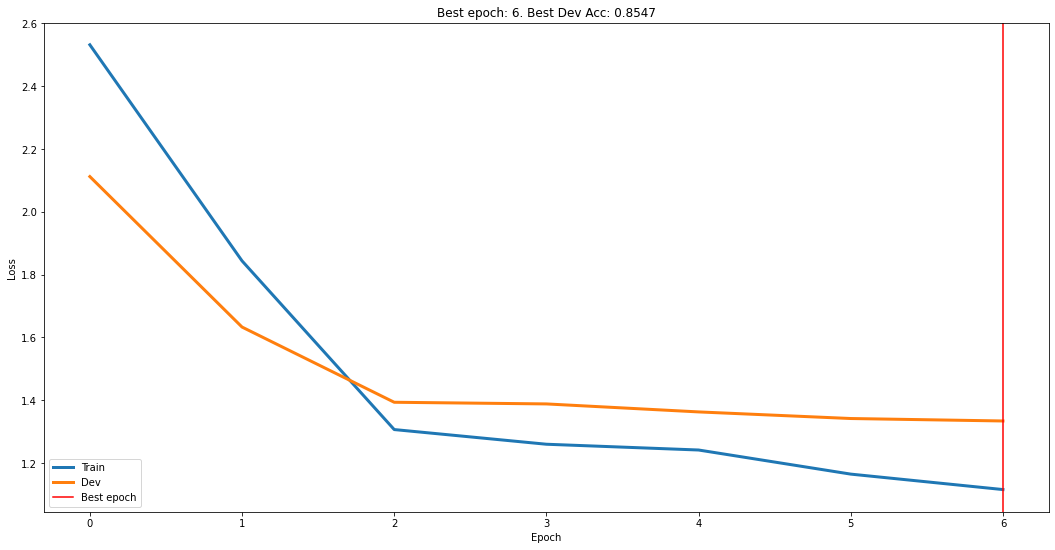


--------------------------------------------------------------------------------

Epoch: 7



Train Avg Acc: 0.881640613079071
Train Loss: 1.033486321568489
Train Accs per class: tensor([0.8813, 0.9109, 0.8719, 0.8625])




Dev Avg Acc: 0.8519531488418579
Dev Loss: 1.3217341244220733
Dev Accs per class: tensor([0.8344, 0.8859, 0.8328, 0.8547])


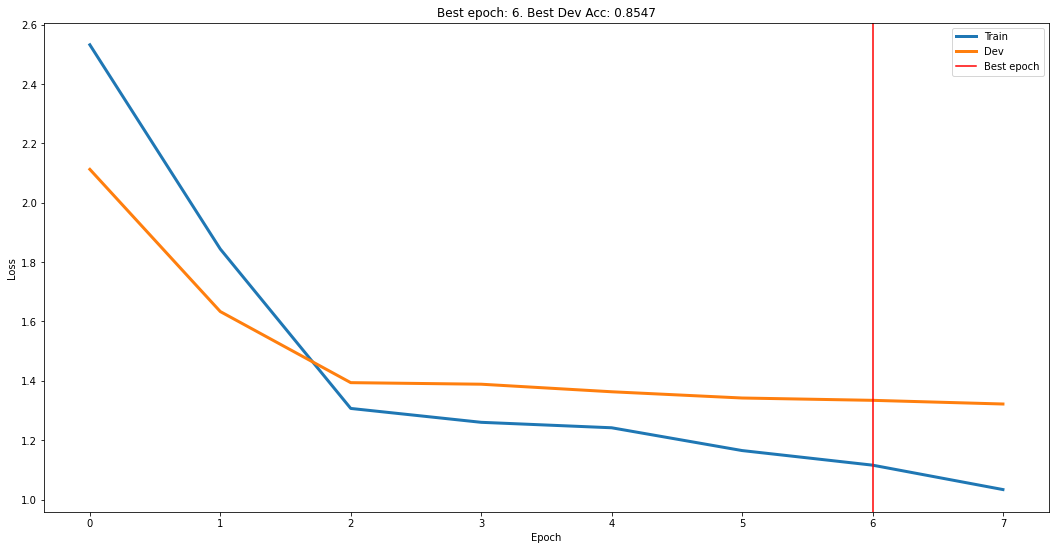


--------------------------------------------------------------------------------

Epoch: 8



Train Avg Acc: 0.899609386920929
Train Loss: 0.9459234267473221
Train Accs per class: tensor([0.8813, 0.9156, 0.9062, 0.8953])




Dev Avg Acc: 0.860546886920929
Dev Loss: 1.3125410556793213
Dev Accs per class: tensor([0.8453, 0.8984, 0.8359, 0.8625])


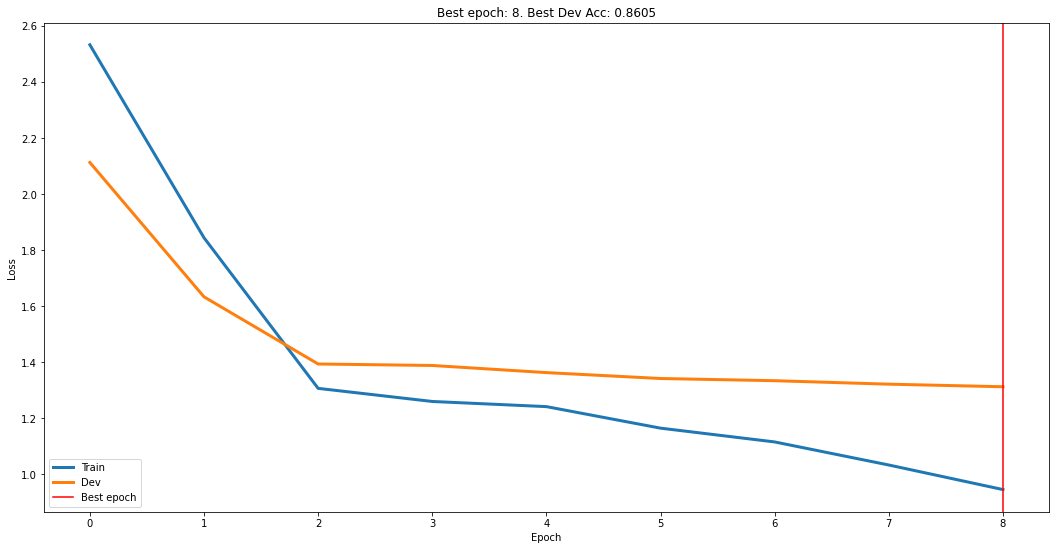


--------------------------------------------------------------------------------

Epoch: 9



Train Avg Acc: 0.8968750238418579
Train Loss: 0.907009556889534
Train Accs per class: tensor([0.8984, 0.9234, 0.8859, 0.8797])




Dev Avg Acc: 0.8589844107627869
Dev Loss: 1.3155525356531144
Dev Accs per class: tensor([0.8500, 0.8984, 0.8313, 0.8562])


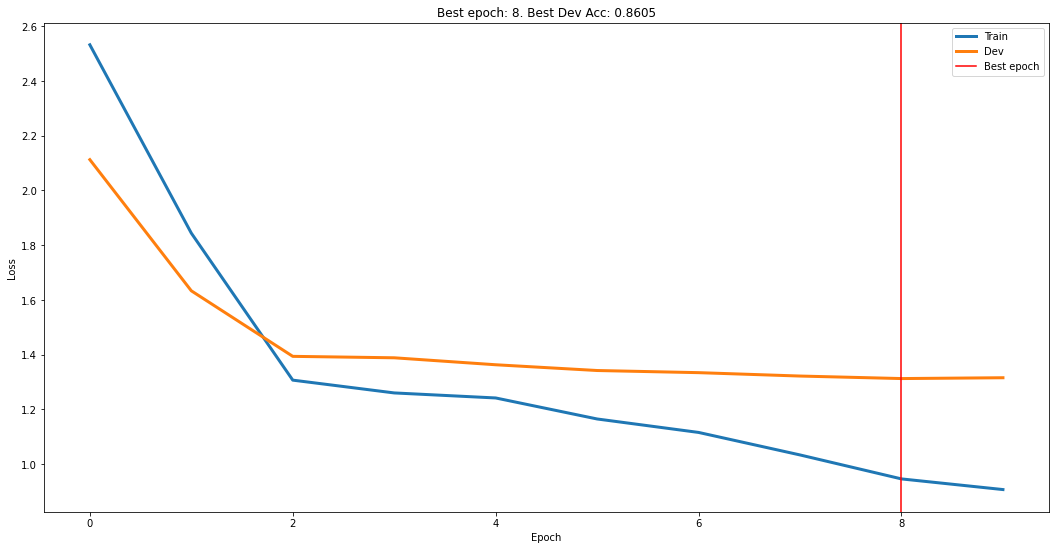


--------------------------------------------------------------------------------

Epoch: 10



Train Avg Acc: 0.901562511920929
Train Loss: 0.9017710775136948
Train Accs per class: tensor([0.8984, 0.9266, 0.8906, 0.8906])




Dev Avg Acc: 0.8601561784744263
Dev Loss: 1.3126943290233613
Dev Accs per class: tensor([0.8453, 0.9000, 0.8375, 0.8578])


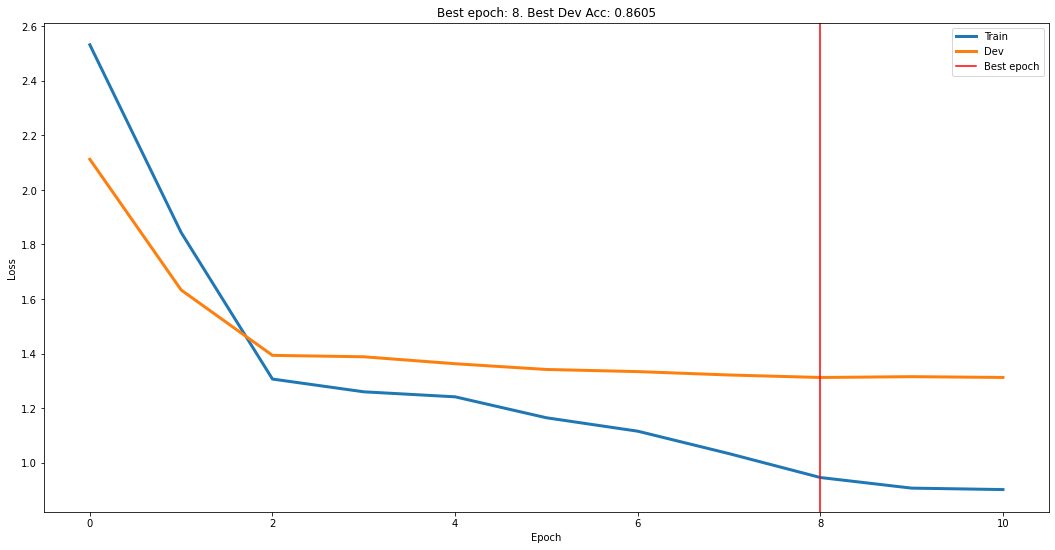


--------------------------------------------------------------------------------

Epoch: 11



Train Avg Acc: 0.90234375
Train Loss: 0.8954801738262177
Train Accs per class: tensor([0.9031, 0.9297, 0.8938, 0.8828])




Dev Avg Acc: 0.8609374761581421
Dev Loss: 1.3087437838315963
Dev Accs per class: tensor([0.8453, 0.9000, 0.8359, 0.8625])


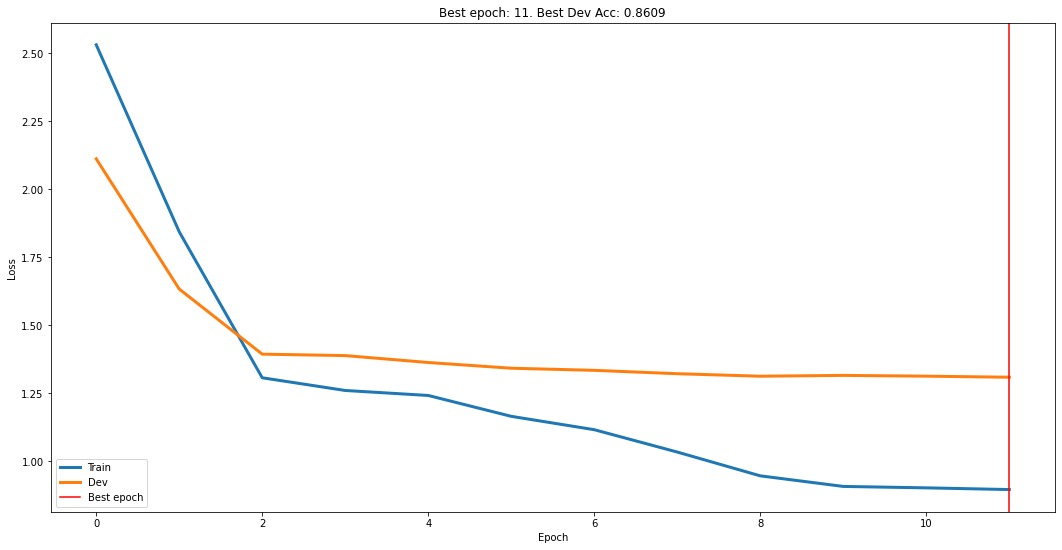


--------------------------------------------------------------------------------

Epoch: 12



Train Avg Acc: 0.9050780534744263
Train Loss: 0.8738352119922638
Train Accs per class: tensor([0.8969, 0.9266, 0.9078, 0.8891])




Dev Avg Acc: 0.858593761920929
Dev Loss: 1.3113355368375779
Dev Accs per class: tensor([0.8438, 0.8953, 0.8359, 0.8594])


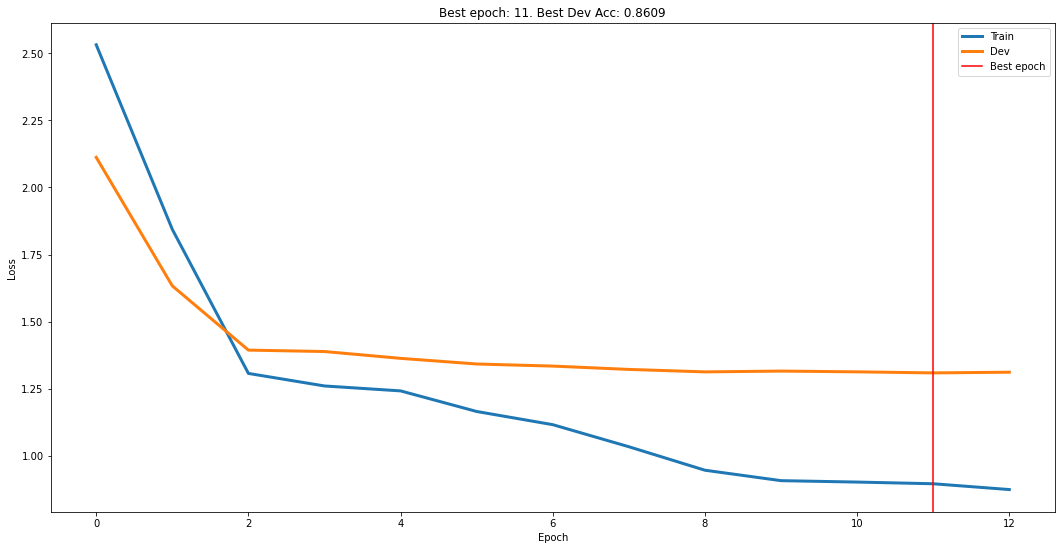


--------------------------------------------------------------------------------

Epoch: 13



Train Avg Acc: 0.9066406488418579
Train Loss: 0.8712643325328827
Train Accs per class: tensor([0.8984, 0.9312, 0.9047, 0.8922])




Dev Avg Acc: 0.859375
Dev Loss: 1.3092539221048356
Dev Accs per class: tensor([0.8438, 0.9000, 0.8375, 0.8562])


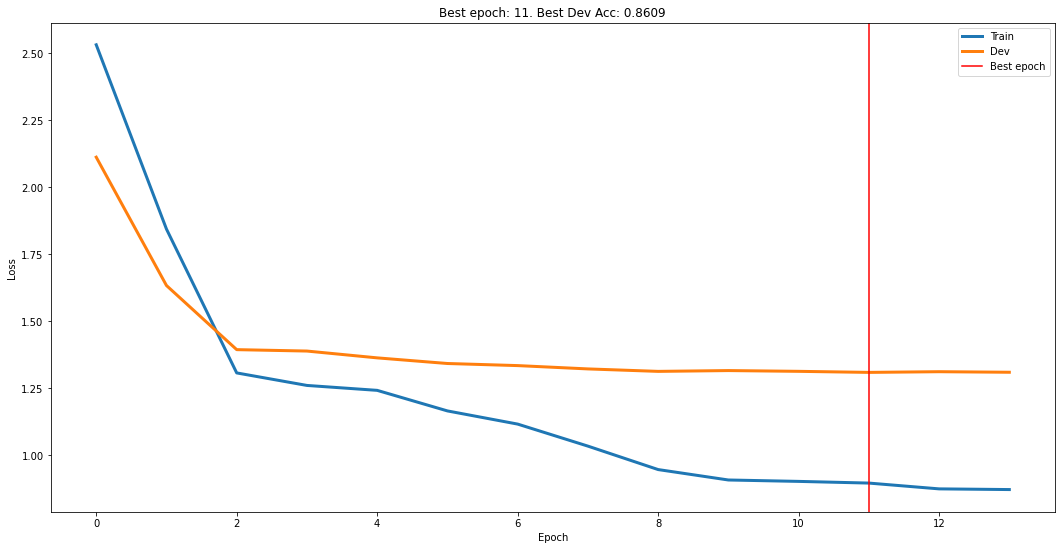


--------------------------------------------------------------------------------




In [30]:
all_layers_num_epochs = 10

train_epoch_loss_history = history['train_losses']
dev_epoch_loss_history = history['dev_losses']

train_per_class_acc_history = history['train_per_class_accuracies']
dev_per_class_acc_history = history['dev_per_class_accuracies']

dev_epoch_acc_history = history['train_average_accuracies']
train_epoch_acc_history = history['dev_average_accuracies']

best_acc = history['best_acc']
best_epoch =  history['best_epoch']

for epoch in trange(last_layer_num_epochs, last_layer_num_epochs+all_layers_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save weights

In [31]:
%mkdir ../weights

mkdir: cannot create directory ‘../weights’: File exists


In [32]:
torch.save(model_ft.state_dict(), f'../weights/{MODEL_NAME}.pth')

In [33]:
%ls ../weights

'Adam_wd=0.0001_2021-06-11.pth'
'Adam_wd=0.01_2021-06-11.pth'
'Adam_wd=100_2021-06-11.pth'
'Adam_wd=10_2021-06-11.pth'
'Adam_wd=1_2021-06-11.pth'
'Adam_wd=1e-08_2021-06-11.pth'
 baseline-2021-06-08.pth
 baseline-2021-06-09.pth
 baseline-Adam-2021-06-11.pth
 resnet18-strong-aug-Adam-last-layer-finetuned.pth
 strong-aug-Adam-2021-06-14.pth
 strong-aug-even-longer-Adam-2021-06-14.pth
 strong-aug-longer-Adam-2021-06-14.pth
 strong-aug-not-so-long-Adam-2021-06-14.pth
'strong-aug-not-so-long-Adam_wd=0.01_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=0.1_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=10_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=1_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=20_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=40_2021-06-14.pth'


## Save history

In [34]:
%mkdir ../history

mkdir: cannot create directory ‘../history’: File exists


In [35]:
train_per_class_acc_history

[tensor([0.8094, 0.8062, 0.7344, 0.6219]),
 tensor([0.8594, 0.8188, 0.8062, 0.7547]),
 tensor([0.8766, 0.8562, 0.8219, 0.8313]),
 tensor([0.8641, 0.8828, 0.8406, 0.8500]),
 tensor([0.8813, 0.8953, 0.8453, 0.8406]),
 tensor([0.8781, 0.9016, 0.8531, 0.8422]),
 tensor([0.8766, 0.9000, 0.8734, 0.8641]),
 tensor([0.8813, 0.9109, 0.8719, 0.8625]),
 tensor([0.8813, 0.9156, 0.9062, 0.8953]),
 tensor([0.8984, 0.9234, 0.8859, 0.8797]),
 tensor([0.8984, 0.9266, 0.8906, 0.8906]),
 tensor([0.9031, 0.9297, 0.8938, 0.8828]),
 tensor([0.8969, 0.9266, 0.9078, 0.8891]),
 tensor([0.8984, 0.9312, 0.9047, 0.8922])]

In [36]:
history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(torch.tensor(el).numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(torch.tensor(el).numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [37]:
with open(f'../history/{MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

In [38]:
%ls ../history

'Adam_wd=0.0001_2021-06-11.json'
'Adam_wd=0.01_2021-06-11.json'
'Adam_wd=100_2021-06-11.json'
'Adam_wd=10_2021-06-11.json'
'Adam_wd=1_2021-06-11.json'
'Adam_wd=1e-08_2021-06-11.json'
 baseline-2021-06-08.json
 baseline-2021-06-09.json
 baseline-Adam-2021-06-11.json
 dummy-classifier.json
 resnet18-strong-aug-Adam-last-layer-finetuned.json
 strong-aug-Adam-2021-06-14.json
 strong-aug-even-longer-Adam-2021-06-14.json
 strong-aug-longer-Adam-2021-06-14.json
 strong-aug-not-so-long-Adam-2021-06-14.json
'strong-aug-not-so-long-Adam_wd=0.01_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=0.1_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=10_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=1_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=20_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=40_2021-06-14.json'
